In [1]:
from joblib import load
import pandas as pd
import code.operators as ops

In [2]:
data = pd.read_csv('x_train.csv', index_col=['Loan_ID'])
svc_bias = load('svc_loan_bias.joblib')
lr_bias = load('lr_loan_bias.joblib')
lr = load('lr_loan.joblib')
svc = load('svc_loan.joblib')

In [3]:
X_new = ops.data_generator_fd(data)

In [4]:
X_new.describe()

,Gender,Education,Self_Employed,Credit_History,Property_Area_Semiurban,Property_Area_Urban,ln_monthly_return,ln_total_income,ln_LoanAmount
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.502000,0.472000,0.51000,0.476000,0.485000,0.493000,1.040241,-0.058420,-1.041237
std,0.500246,0.499465,0.50015,0.499674,0.500025,0.500201,22.529506,21.700587,23.608858
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-66.370103,-64.807517,-70.356328
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-14.508944,-15.249814,-17.457923
50%,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.144091,-0.345658,-0.377131
75%,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,16.799455,15.464051,14.784097
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,80.317343,61.565245,78.491872


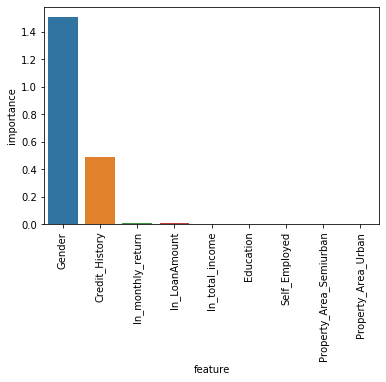

In [5]:
ops.plot_feature_importance(x='feature', y='importance', data=ops.feature_importance(lr_bias, X_new))

In [5]:
pred_n_bias = ops.create_eval(svc_bias, X_new)

In [6]:
ops.calc_disparity_index(pred_n_bias, 'Pred', 'Gender',1,0)

1-min(DI, 1/DI): 0.931
There is a potential bias


In [7]:
ops.calc_stat_parity(pred_n_bias, 'Pred', 'Gender',1,0)

-0.448
The algorithm can be considered to be not biased


In [8]:
ops.calc_mean_diff(pred_n_bias, 'Pred', 'Gender',1,0)

-0.448
There is a potential bias


In [9]:
ops.equal_opportunity(X_new, pred_n_bias, 'Pred', 'Gender', 1, 0)

-0.4229117647058824
There is a potential bias


In [10]:
ops.coeff_variation(X_new, pred_n_bias, 'Pred', 'Gender', 1, 0)

0.4099123371747292
There is a potential bias


In [16]:
bina = ops.create_binary(pred_n_bias, 'Pred', 'Gender', 1, 0)

In [17]:
ops.MetricTextExplainer_(bina).explain()

Number of instances: 1000.0
Statistical parity difference (probability of favorable outcome for unprivileged instances - probability of favorable outcome for privileged instances): -0.4484984642246437
Number of positive-outcome instances: 265.0
Number of negative-outcome instances: 735.0
Mean difference (mean label value on privileged instances - mean label value on unprivileged instances): -0.4484984642246437
Disparate impact (probability of favorable outcome for unprivileged instances / probability of favorable outcome for privileged instances): 0.06878029717212536
Consistency (Zemel, et al. 2013): [0.7018]
